<a href="https://colab.research.google.com/github/hadwin-357/ML_Chem/blob/main/rdkit_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rdkit-pypi==2022.3.1.1


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.7/22.7 MB 29.4 MB/s eta 0:00:00


In [9]:
!mkdir data

In [3]:
import requests
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem

In [11]:
import pandas as pd
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import IPythonConsole

IPythonConsole.ipython_useSVG =False

In [20]:
df = pd.read_csv('/content/chembl_drugs.txt.gz', sep='\t')

In [24]:
df[:5]

,PARENT_MOLREGNO,CHEMBL_ID,SYNONYMS,DEVELOPMENT_PHASE,RESEARCH_CODES,APPLICANTS,USAN_STEM,USAN_STEM_DEFINITION,USAN_STEM_SUBSTEM,USAN_YEAR,...,PRODRUG,ORAL,PARENTERAL,TOPICAL,BLACK_BOX,AVAILABILITY_TYPE,WITHDRAWN_YEAR,WITHDRAWN_COUNTRY,WITHDRAWN_REASON,CANONICAL_SMILES
0,675015,CHEMBL1201064,"Fluorometholone Acetate (FDA, USAN)",4,U-17323,Alcon Laboratories Inc,-olone,steroids (not prednisolone derivatives),-olone,1984.0,...,Y,N,N,Y,N,Prescription-only,NaN,NaN,NaN,C[C@H]1C[C@H]2[C@@H]3CC[C@](OC(=O)C)(C(=O)C)[C...
1,112655,CHEMBL1009,"Levodopa (BAN, FDA, INN, JAN, USAN, USP)",4,NaN,Shire Development Inc; Orion Pharma; Merck Sha...,-dopa,dopamine receptor agonists,-dopa,1969.0,...,N,Y,N,N,N,Prescription-only,NaN,NaN,NaN,N[C@@H](Cc1ccc(O)c(O)c1)C(=O)O
2,993371,CHEMBL1569487,"Lornoxicam (BAN, INN, USAN)",3,Ro-139297,"Cl Pharma Ag, Austria",-icam,anti-inflammatory agents (isoxicam type),-icam,1993.0,...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CN1C(=C(O)c2sc(Cl)cc2S1(=O)=O)C(=O)Nc3ccccn3
3,435293,CHEMBL270190,"Alvimopan (BAN, FDA, INN, USAN)",4,ADL 8-2698,Cubist Pharmaceuticals Inc,NaN,NaN,NaN,2002.0,...,N,Y,N,N,Y,Prescription-only,NaN,NaN,NaN,C[C@H]1CN(C[C@H](Cc2ccccc2)C(=O)NCC(=O)O)CC[C@...
4,246,CHEMBL9,"Norfloxacin (BAN, FDA, INN, JAN, USAN, USP)",4,MK-366,Merck Research Laboratories Div Merck Co Inc,-oxacin,antibacterials (quinolone derivatives),-oxacin,1984.0,...,N,Y,N,Y,Y,Prescription-only,NaN,NaN,NaN,CCN1C=C(C(=O)O)C(=O)c2cc(F)c(cc12)N3CCNCC3


In [25]:
len(df)

11442

In [26]:
# keep compound with SIMILES, that meets rule of five and on market
df = df[df['CANONICAL_SMILES'].notnull() &
        (df['RULE_OF_FIVE']=='Y') &
        (df['DEVELOPMENT_PHASE']== 4)].copy()

In [28]:
len(df)

1284

In [29]:
# convert to rdkit molecule
PandasTools.AddMoleculeColumnToFrame(df, 'CANONICAL_SMILES', 'Structure')


In [30]:
#remove RDkit structure not available
df = df[~df['Structure'].isnull()]

In [32]:
#create a column of the compound name
df['name'] = df.apply(lambda x: x['SYNONYMS'].split('(')[0] if type(x['SYNONYMS']) is str else None, axis=1)


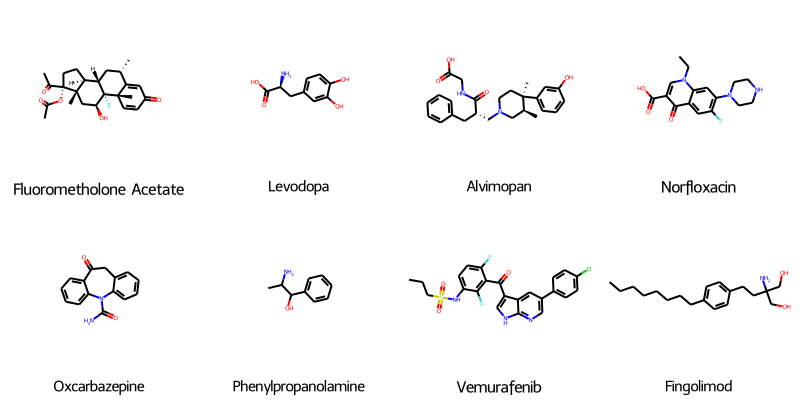

In [36]:
#visualize the molecule
PandasTools.FrameToGridImage(df[:8],column='Structure', legendsCol='name', molsPerRow=4)

<Axes: >

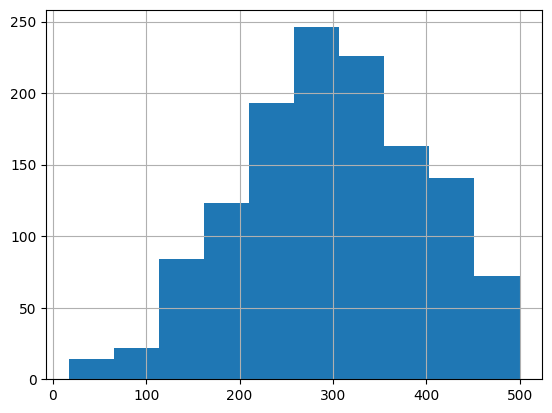

In [39]:
#add descriptors
from rdkit.Chem import Descriptors
df['MW'] = df['Structure'].map(Descriptors.MolWt)
df['logP'] = df['Structure'].map(Descriptors.MolLogP)
df['MW'].hist()

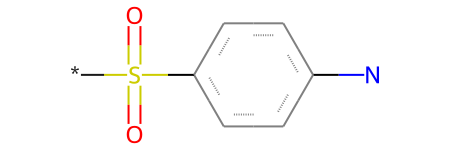

In [40]:
#Make querry usign SMARTS
query = Chem.MolFromSmarts('N-c1ccc(-S(=O)(=O)-[*])cc1')
query

In [41]:
#do substructre searching using >=
len(df[df['Structure']>=query])

35

,SYNONYMS,Structure
45,"Sulfadimethoxine (BAN, INN, JAN, MI, NF, USP);...",
48,Bendrofluazide (BAN); Bendroflumethiazide (FDA...,
51,"Hydrochlorothiazide (BAN, FDA, INN, JAN, USP)",
155,"Sulfapyridine (BAN, FDA, INN, USP); Sulfapyrid...",
266,"Sulfaphenazole (BAN, FDA, INN, JAN, MI)",

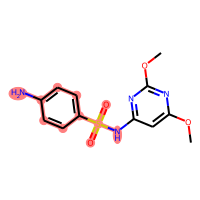
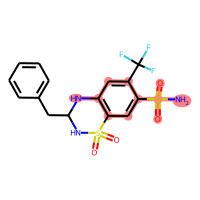
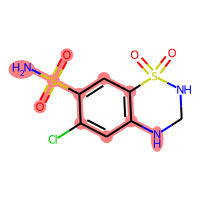
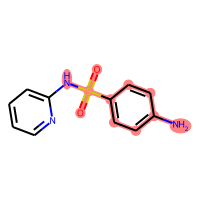
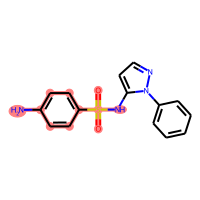

In [43]:
df[df['Structure']>=query][['SYNONYMS', 'Structure']].head(5)